# Amaan Ahmad Khan (Task4) #GRIPJUNE21

Problem Statement-1)Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
2) As a security/defense analyst, try to find out the hot zone of terrorism.
3) What all security issues and insights you can derive by EDA?

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
df=pd.read_csv("/home/zeeshan/Downloads/Global_Terrorism_data/globalterrorismdb_0718dist.csv",encoding="iso-8859-1")
df.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [3]:
df.shape

(181691, 135)

In [4]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [68]:
sample_df=df[['eventid', 'iyear', 'imonth', 'iday','crit1', 'crit2', 'crit3','doubtterr',
             'country', 'country_txt', 'region', 'region_txt',
             'provstate', 'city','attacktype1', 'attacktype1_txt',
             'success','suicide','targtype1', 'targtype1_txt',
             'INT_LOG']]

In [6]:
sample_df.head()

,eventid,iyear,imonth,iday,crit1,crit2,crit3,doubtterr,country,country_txt,...,region_txt,provstate,city,attacktype1,attacktype1_txt,success,suicide,targtype1,targtype1_txt,INT_LOG
0,197000000001,1970,7,2,1,1,1,0.0,58,Dominican Republic,...,Central America & Caribbean,NaN,Santo Domingo,1,Assassination,1,0,14,Private Citizens & Property,0
1,197000000002,1970,0,0,1,1,1,0.0,130,Mexico,...,North America,Federal,Mexico city,6,Hostage Taking (Kidnapping),1,0,7,Government (Diplomatic),0
2,197001000001,1970,1,0,1,1,1,0.0,160,Philippines,...,Southeast Asia,Tarlac,Unknown,1,Assassination,1,0,10,Journalists & Media,-9
3,197001000002,1970,1,0,1,1,1,0.0,78,Greece,...,Western Europe,Attica,Athens,3,Bombing/Explosion,1,0,7,Government (Diplomatic),-9
4,197001000003,1970,1,0,1,1,1,-9.0,101,Japan,...,East Asia,Fukouka,Fukouka,7,Facility/Infrastructure Attack,1,0,7,Government (Diplomatic),-9


In [7]:
for i in sample_df.columns:
    print(i,sample_df[i].isna().sum())

eventid 0
iyear 0
imonth 0
iday 0
crit1 0
crit2 0
crit3 0
doubtterr 1
country 0
country_txt 0
region 0
region_txt 0
provstate 421
city 434
attacktype1 0
attacktype1_txt 0
success 0
suicide 0
targtype1 0
targtype1_txt 0
INT_LOG 0


In [8]:
sample_df["attacktype1_txt"].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [9]:
sample_df["country_txt"].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
Falkland Islands           1
New Hebrides               1
International              1
Antigua and Barbuda        1
South Vietnam              1
Name: country_txt, Length: 205, dtype: int64

In [10]:
sample_df["doubtterr"].value_counts()

 0.0    138905
 1.0     29001
-9.0     13784
Name: doubtterr, dtype: int64

In [11]:
sample_df["INT_LOG"].value_counts()

-9    92527
 0    81976
 1     7188
Name: INT_LOG, dtype: int64

In [12]:
sample_df["targtype1_txt"].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

In [13]:
sample_df=sample_df.copy()

In [14]:
filt=(sample_df.doubtterr==-9.0) & (sample_df.success==0)
sample_df.loc[filt,'doubtterr']=1.0

In [15]:
filt=(sample_df.doubtterr==-9.0) & (sample_df.success==1)
sample_df.loc[filt,'doubtterr']=0.0

In [16]:
sample_df["doubtterr"].value_counts()

0.0    151660
1.0     30030
Name: doubtterr, dtype: int64

In [17]:
sample_df.loc[(sample_df.doubtterr!=0.0) & (sample_df.doubtterr!=1.0),"doubtterr"]=0.0

In [18]:
sample_df["doubtterr"].value_counts()

0.0    151661
1.0     30030
Name: doubtterr, dtype: int64

In [19]:
sample_df["doubtterr"]=sample_df["doubtterr"].astype("int")

In [20]:
sample_df.head()

,eventid,iyear,imonth,iday,crit1,crit2,crit3,doubtterr,country,country_txt,...,region_txt,provstate,city,attacktype1,attacktype1_txt,success,suicide,targtype1,targtype1_txt,INT_LOG
0,197000000001,1970,7,2,1,1,1,0,58,Dominican Republic,...,Central America & Caribbean,NaN,Santo Domingo,1,Assassination,1,0,14,Private Citizens & Property,0
1,197000000002,1970,0,0,1,1,1,0,130,Mexico,...,North America,Federal,Mexico city,6,Hostage Taking (Kidnapping),1,0,7,Government (Diplomatic),0
2,197001000001,1970,1,0,1,1,1,0,160,Philippines,...,Southeast Asia,Tarlac,Unknown,1,Assassination,1,0,10,Journalists & Media,-9
3,197001000002,1970,1,0,1,1,1,0,78,Greece,...,Western Europe,Attica,Athens,3,Bombing/Explosion,1,0,7,Government (Diplomatic),-9
4,197001000003,1970,1,0,1,1,1,0,101,Japan,...,East Asia,Fukouka,Fukouka,7,Facility/Infrastructure Attack,1,0,7,Government (Diplomatic),-9


In [21]:
sample_df[(sample_df["city"].isna()) & (sample_df["provstate"].isna())]

,eventid,iyear,imonth,iday,crit1,crit2,crit3,doubtterr,country,country_txt,...,region_txt,provstate,city,attacktype1,attacktype1_txt,success,suicide,targtype1,targtype1_txt,INT_LOG


In [22]:
sample_df["city"].fillna(sample_df["provstate"],inplace=True)

In [23]:
sample_df["city"].value_counts()

Unknown            9777
Baghdad            7589
Karachi            2652
Lima               2359
Mosul              2265
                   ... 
Chilcas               1
Banjud                1
Nam Cha               1
Sanah district        1
Lokoja district       1
Name: city, Length: 36724, dtype: int64

In [24]:
sample_df.loc[(sample_df.city=="Unknown") & (sample_df.provstate!="Unknown"),"city"]="provstate"

In [25]:
sample_df["city"].value_counts()

Baghdad            7589
provstate          7567
Karachi            2652
Lima               2359
Mosul              2265
                   ... 
Chilcas               1
Banjud                1
Nam Cha               1
Sanah district        1
Lokoja district       1
Name: city, Length: 36725, dtype: int64

In [26]:
sample_df.loc[sample_df.city=="Unknown","city"].count()


2210

In [27]:
sample_df.loc[sample_df.provstate=="Unknown","provstate"].count()

4290

In [28]:
sample_df.loc[(sample_df.provstate=="Unknown") & (sample_df.city!="Unknown"),"provstate"]="city"

In [41]:
sample_df.loc[(sample_df.provstate=="Unknown") & (sample_df.city=="Unknown"),"country_txt"].value_counts()


Colombia                          248
El Salvador                       226
Iraq                              115
Peru                               91
Afghanistan                        86
                                 ... 
Djibouti                            1
Botswana                            1
Andorra                             1
Vietnam                             1
People's Republic of the Congo      1
Name: country_txt, Length: 131, dtype: int64

In [30]:
(sample_df.country_txt=="Colombia").sum()

8306

In [31]:
sample_df["provstate"].fillna(sample_df["city"],inplace=True)

In [32]:
(sample_df.provstate=="Unknown").sum()

2210

In [35]:
sample_df[(sample_df.city=="Unknown") & (sample_df.provstate=="Unknown") & (sample_df.attacktype1_txt=="Unknown") & (sample_df.success==0)]

,eventid,iyear,imonth,iday,crit1,crit2,crit3,doubtterr,country,country_txt,...,region_txt,provstate,city,attacktype1,attacktype1_txt,success,suicide,targtype1,targtype1_txt,INT_LOG
11700,198008230011,1980,8,23,1,1,1,1,205,Thailand,...,Southeast Asia,Unknown,Unknown,9,Unknown,0,0,3,Police,-9
12633,198101090003,1981,1,9,1,1,1,1,185,Spain,...,Western Europe,Unknown,Unknown,9,Unknown,0,0,14,Private Citizens & Property,-9
16571,198207140003,1982,7,14,1,1,1,0,61,El Salvador,...,Central America & Caribbean,Unknown,Unknown,9,Unknown,0,0,19,Transportation,-9
62504,199605270004,1996,5,27,1,1,1,0,45,Colombia,...,South America,Unknown,Unknown,9,Unknown,0,0,1,Business,0
74193,200205270002,2002,5,27,1,1,1,1,42,Chad,...,Sub-Saharan Africa,Unknown,Unknown,9,Unknown,0,0,4,Military,0
170008,201612030026,2016,12,3,1,1,0,1,1004,South Sudan,...,Sub-Saharan Africa,Unknown,Unknown,9,Unknown,0,0,4,Military,-9
170548,201612220030,2016,12,22,1,1,0,1,228,Yemen,...,Middle East & North Africa,Unknown,Unknown,9,Unknown,0,0,4,Military,0


In [35]:
valuesCounts1=sample_df.loc[(sample_df.provstate=="Unknown") & (sample_df.city=="Unknown"),"country_txt"].value_counts()
valuesCounts1

Colombia             248
El Salvador          226
Iraq                 115
Peru                  91
Afghanistan           86
                    ... 
Austria                1
Czechoslovakia         1
Maldives               1
Equatorial Guinea      1
Grenada                1
Name: country_txt, Length: 131, dtype: int64

In [37]:
total_values=sample_df["country_txt"].value_counts()
total_values

Iraq             24636
Pakistan         14368
Afghanistan      12731
India            11960
Colombia          8306
                 ...  
New Hebrides         1
North Korea          1
International        1
St. Lucia            1
Andorra              1
Name: country_txt, Length: 205, dtype: int64

In [63]:
python_df=pd.concat([total_values,valuesCounts1],axis="columns",sort=False)
python_df.columns=["Total","Filtered"]
python_df["%Filtered/Total"]=round((python_df["Filtered"]/python_df["Total"])*100,2)

In [68]:
python_df.sort_values(by="%Filtered/Total").head()

,Total,Filtered,%Filtered/Total
United States,2836,1.0,0.04
West Bank and Gaza Strip,2227,2.0,0.09
Russia,2194,2.0,0.09
India,11960,22.0,0.18
Pakistan,14368,40.0,0.28


In [60]:
for i,j in zip(valuesCounts,countries):
    sumofCountry=(sample_df.country_txt==j).sum()
    print(f"{j} total values= {sumofCountry}  : ",round((i/sumofCountry)*100,2),"%")

Colombia total values= 8306  :  2.99 %
El Salvador total values= 5320  :  4.25 %
Iraq total values= 24636  :  0.47 %
Peru total values= 6096  :  1.49 %
Afghanistan total values= 12731  :  0.68 %
Philippines total values= 6908  :  1.22 %
Yemen total values= 3347  :  2.18 %
Turkey total values= 4292  :  1.37 %
Guatemala total values= 2050  :  2.88 %
Lebanon total values= 2478  :  2.18 %
Cambodia total values= 259  :  18.15 %
Sri Lanka total values= 3022  :  1.36 %
Bangladesh total values= 1648  :  2.43 %
Pakistan total values= 14368  :  0.28 %
Chile total values= 2365  :  1.69 %
Nigeria total values= 3907  :  1.0 %
Syria total values= 2201  :  1.5 %
Sudan total values= 967  :  3.1 %
Spain total values= 3249  :  0.92 %
South Africa total values= 2016  :  1.49 %
Mozambique total values= 363  :  7.44 %
Algeria total values= 2743  :  0.98 %
Iran total values= 684  :  3.95 %
Nicaragua total values= 1970  :  1.32 %
Libya total values= 2249  :  1.07 %
Thailand total values= 3849  :  0.62 %
Mali

In [63]:
filt=(sample_df.city=="Unknown") & (sample_df.provstate=="Unknown")
sample_df.drop(index=sample_df[filt].index,inplace=True)

In [64]:
(sample_df.city=="Unknown").sum()

0

In [65]:
(sample_df.provstate=="Unknown").sum()

0

In [66]:
sample_df.to_csv("CleanDataTask4.csv")

In [3]:
data=pd.read_csv("/home/zeeshan/Desktop/Data analysis/GRIP JUNE/CleanDataTask4.csv",index_col=[0])
data.head()

,eventid,iyear,imonth,iday,crit1,crit2,crit3,doubtterr,country,country_txt,...,region_txt,provstate,city,attacktype1,attacktype1_txt,success,suicide,targtype1,targtype1_txt,INT_LOG
0,197000000001,1970,7,2,1,1,1,0,58,Dominican Republic,...,Central America & Caribbean,Santo Domingo,Santo Domingo,1,Assassination,1,0,14,Private Citizens & Property,0
1,197000000002,1970,0,0,1,1,1,0,130,Mexico,...,North America,Federal,Mexico city,6,Hostage Taking (Kidnapping),1,0,7,Government (Diplomatic),0
2,197001000001,1970,1,0,1,1,1,0,160,Philippines,...,Southeast Asia,Tarlac,provstate,1,Assassination,1,0,10,Journalists & Media,-9
3,197001000002,1970,1,0,1,1,1,0,78,Greece,...,Western Europe,Attica,Athens,3,Bombing/Explosion,1,0,7,Government (Diplomatic),-9
4,197001000003,1970,1,0,1,1,1,0,101,Japan,...,East Asia,Fukouka,Fukouka,7,Facility/Infrastructure Attack,1,0,7,Government (Diplomatic),-9


In [4]:
data.sort_values(by="attacktype1")

,eventid,iyear,imonth,iday,crit1,crit2,crit3,doubtterr,country,country_txt,...,region_txt,provstate,city,attacktype1,attacktype1_txt,success,suicide,targtype1,targtype1_txt,INT_LOG
0,197000000001,1970,7,2,1,1,1,0,58,Dominican Republic,...,Central America & Caribbean,Santo Domingo,Santo Domingo,1,Assassination,1,0,14,Private Citizens & Property,0
150368,201507090026,2015,7,9,1,1,1,0,95,Iraq,...,Middle East & North Africa,Wasit,As Suwayrah district,1,Assassination,1,0,3,Police,-9
40920,198912140001,1989,12,14,1,1,1,0,43,Chile,...,South America,Santiago Metropolitan,Santiago,1,Assassination,1,0,3,Police,0
40914,198912130002,1989,12,13,1,1,1,0,155,West Bank and Gaza Strip,...,Middle East & North Africa,West Bank,Nablus,1,Assassination,1,0,14,Private Citizens & Property,0
40913,198912130001,1989,12,13,1,1,0,1,185,Spain,...,Western Europe,Madrid,Madrid,1,Assassination,0,0,4,Military,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153201,201509170028,2015,9,17,1,1,1,0,4,Afghanistan,...,South Asia,Farah,Farah district,9,Unknown,1,0,3,Police,0
153202,201509170029,2015,9,17,1,1,1,0,4,Afghanistan,...,South Asia,Farah,Farah district,9,Unknown,1,0,3,Police,0
87136,200805300017,2008,5,30,1,1,1,0,182,Somalia,...,Sub-Saharan Africa,Bay,Leego,9,Unknown,0,0,14,Private Citizens & Property,-9
123747,201311220009,2013,11,21,1,1,1,0,45,Colombia,...,South America,Cauca,Toribio,9,Unknown,1,0,3,Police,0


In [5]:
data.describe()

,eventid,iyear,imonth,iday,crit1,crit2,crit3,doubtterr,country,region,attacktype1,success,suicide,targtype1,INT_LOG
count,1.794810e+05,179481.000000,179481.000000,179481.000000,179481.000000,179481.000000,179481.000000,179481.000000,179481.000000,179481.000000,179481.000000,179481.000000,179481.000000,179481.000000,179481.000000
mean,2.002799e+11,2002.733131,6.467498,15.514366,0.988461,0.993102,0.875692,0.165277,132.213672,7.167856,3.238510,0.889119,0.036862,8.419276,-4.552231
std,1.324238e+09,13.242268,3.388641,8.810124,0.106798,0.082765,0.329934,0.371431,112.698775,2.925553,1.907459,0.313985,0.188423,6.641736,4.543012
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-9.000000
25%,1.991031e+11,1991.000000,4.000000,8.000000,1.000000,1.000000,1.000000,0.000000,78.000000,5.000000,2.000000,1.000000,0.000000,3.000000,-9.000000
50%,2.009042e+11,2009.000000,6.000000,15.000000,1.000000,1.000000,1.000000,0.000000,98.000000,6.000000,3.000000,1.000000,0.000000,4.000000,-9.000000
75%,2.014082e+11,2014.000000,9.000000,23.000000,1.000000,1.000000,1.000000,0.000000,160.000000,10.000000,3.000000,1.000000,0.000000,14.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1004.000000,12.000000,9.000000,1.000000,1.000000,22.000000,1.000000


In [6]:
filt=(data["country_txt"]=="Iraq")
data.loc[filt]["attacktype1_txt"].value_counts()

Bombing/Explosion                      18246
Armed Assault                           3133
Assassination                           1275
Hostage Taking (Kidnapping)              912
Unknown                                  759
Facility/Infrastructure Attack           153
Hostage Taking (Barricade Incident)       24
Hijacking                                 13
Unarmed Assault                            6
Name: attacktype1_txt, dtype: int64

In [7]:
country_grp=data.groupby(["country_txt"])

In [8]:
country_grp["attacktype1_txt"].value_counts(normalize=True).loc["India"]

attacktype1_txt
Bombing/Explosion                      0.403753
Armed Assault                          0.266293
Assassination                          0.102781
Hostage Taking (Kidnapping)            0.098844
Facility/Infrastructure Attack         0.083096
Unknown                                0.026135
Unarmed Assault                        0.011979
Hostage Taking (Barricade Incident)    0.003686
Hijacking                              0.003434
Name: attacktype1_txt, dtype: float64

In [9]:
country_grp["attacktype1"].median().value_counts()

3.0    144
2.0     28
7.0     11
6.0      4
1.0      4
1.5      2
2.5      2
3.5      2
4.0      2
5.0      2
5.5      1
8.0      1
4.5      1
Name: attacktype1, dtype: int64

In [10]:
country_grp["attacktype1"].agg(["median","mean"]).loc["India"]

median    3.00000
mean      3.38457
Name: India, dtype: float64

In [11]:
xData=data["iyear"].value_counts().index
yData=data["iyear"].value_counts()

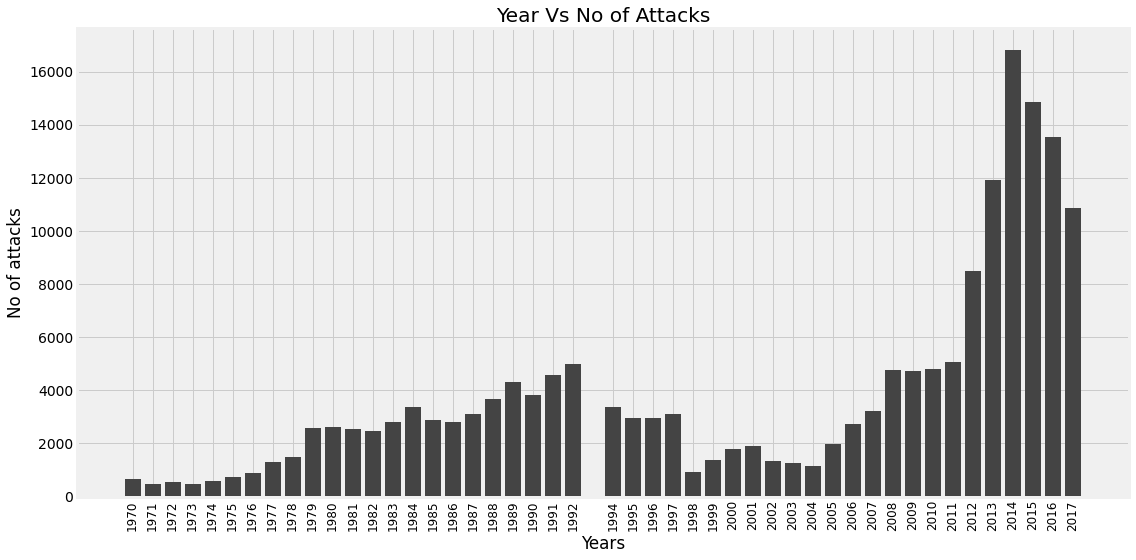

In [12]:
plt.figure(figsize=(16,8))
plt.style.use("fivethirtyeight")
plt.bar(xData,yData,color="#444444")
plt.xticks(xData,fontsize=12,rotation="vertical")
plt.title("Year Vs No of Attacks")
plt.xlabel("Years")
plt.ylabel("No of attacks")
plt.tight_layout()
plt.show()

In [13]:
regionXData=data["region_txt"].value_counts().index
regionYData=data["region_txt"].value_counts()

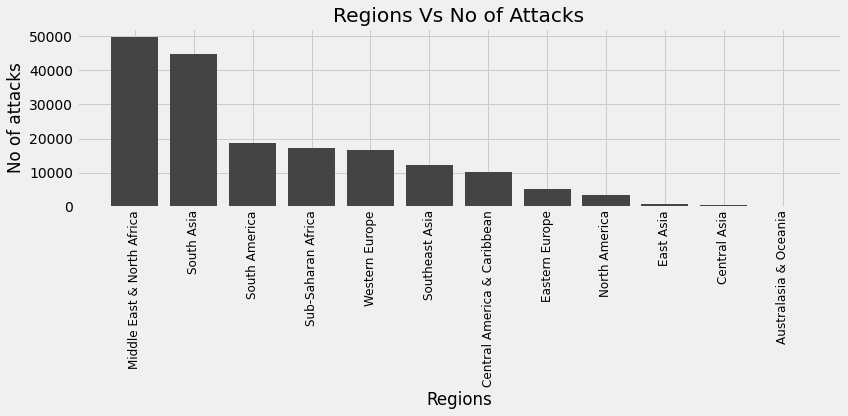

In [14]:
plt.figure(figsize=(12,6))
plt.style.use("fivethirtyeight")
plt.bar(regionXData,regionYData,color="#444444")
plt.xticks(regionXData,fontsize=12,rotation="vertical")
plt.title("Regions Vs No of Attacks")
plt.xlabel("Regions")
plt.ylabel("No of attacks")
plt.tight_layout()
plt.show()

In [15]:
CountryXData=data["country_txt"].value_counts().nlargest(10).index
CountryYData=data["country_txt"].value_counts().nlargest(10)

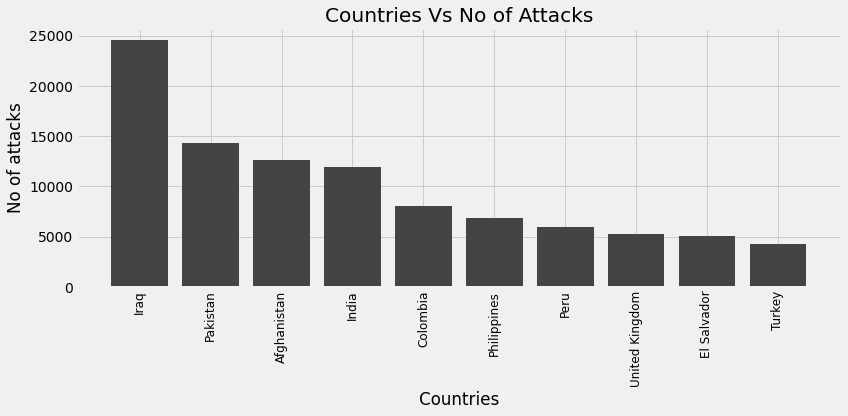

In [16]:
plt.figure(figsize=(12,6))
plt.style.use("fivethirtyeight")
plt.bar(CountryXData,CountryYData,color="#444444")
plt.xticks(CountryXData,fontsize=12,rotation="vertical")
plt.title("Countries Vs No of Attacks")
plt.xlabel("Countries")
plt.ylabel("No of attacks")
plt.tight_layout()
plt.show()

In [17]:
year_grp=data.groupby(["iyear"])

In [18]:
year_grp["success"].value_counts()

iyear  success
1970   1            543
       0            101
1971   1            413
       0             51
1972   1            449
                  ...  
2015   0           2279
2016   1          10936
       0           2603
2017   1           8615
       0           2240
Name: success, Length: 94, dtype: int64

<AxesSubplot:title={'center':'Success Vs Failure'}, xlabel='iyear', ylabel='count'>

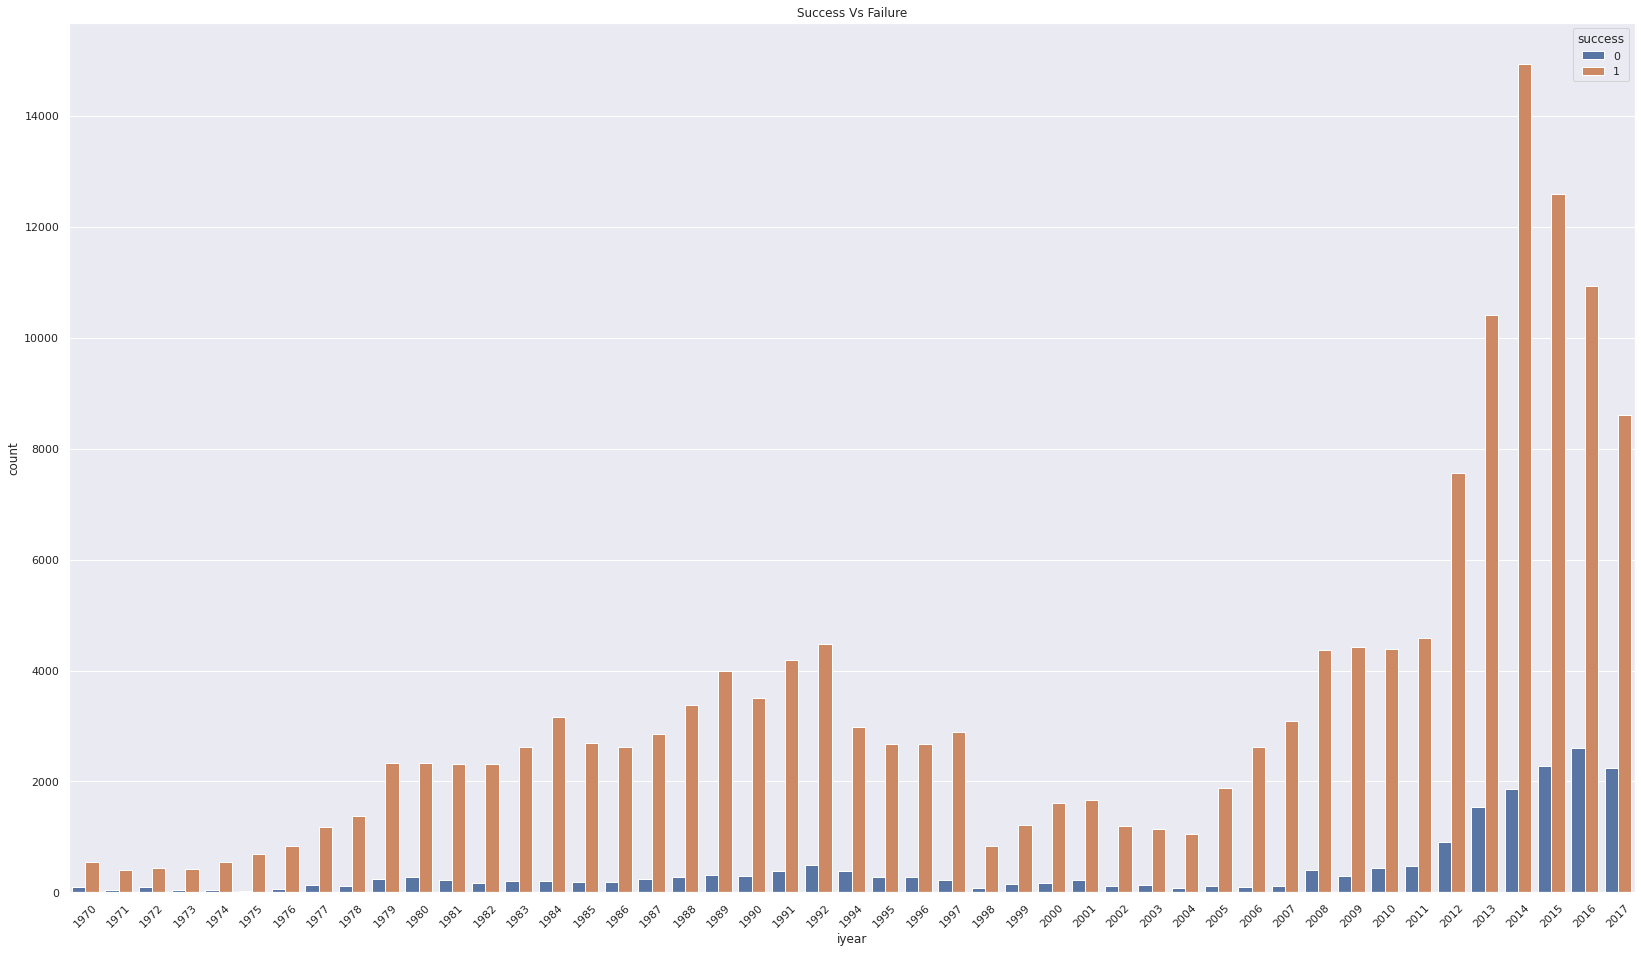

In [37]:
plt.figure(figsize=(25,16))
plt.title("Success Vs Failure")
sns.set_theme(style="darkgrid")
chart=sns.countplot(x="iyear",hue="success",data=data,orient="v")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart

# To be continued